<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li><li><span><a href="#Работа-с-аномальными-значениями-и-выбросами" data-toc-modified-id="Работа-с-аномальными-значениями-и-выбросами-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Работа с аномальными значениями и выбросами</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Прямое-кодирование" data-toc-modified-id="Прямое-кодирование-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Прямое кодирование</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
import numpy as np
import seaborn as sns
from numpy import mean
from sklearn.metrics import mean_squared_error

In [2]:
# загрузим данные и посмотрим их
df = pd.read_csv('/datasets/autos.csv')


### Анализ данных

In [3]:
df.shape

(354369, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


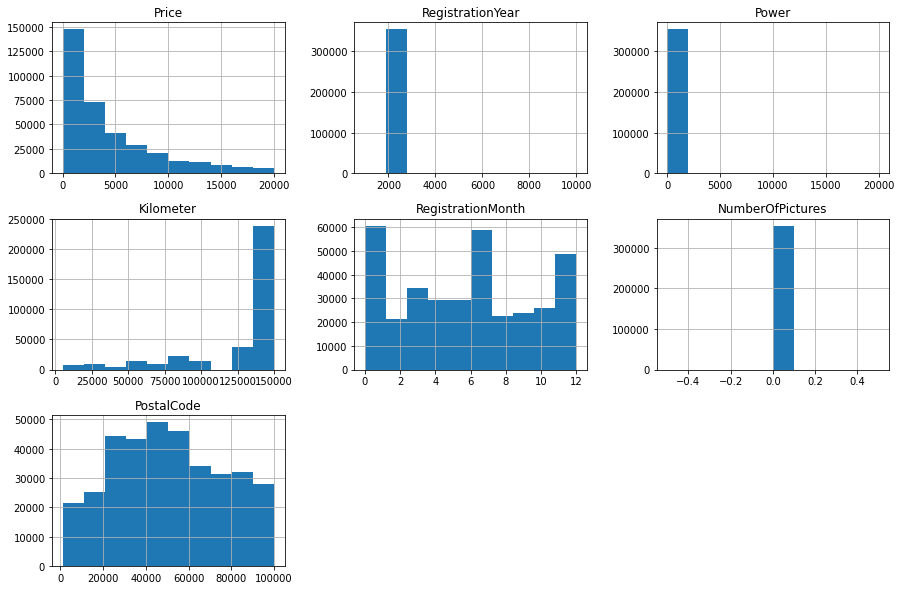

In [7]:
# посмотрим на данные
df.hist(figsize=(15, 10));

In [8]:
# посмотрим корреляцию
df.corr()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


<AxesSubplot:>

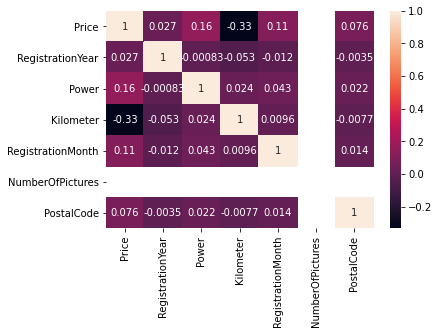

In [9]:
sns.heatmap(df.corr(), annot = True)

Данные содержат 354369 строк и 16 столбцов
- 7 столбцов целочисленные, остальные строки
- неправильное написание названий столбцов
- имеются пропуски
- не увидели значимых зависимостей, только обратная зависимоссть между Ценой и Пробегом

Увидели странные значения:
- Цена: 0 и 20 тыс евро
- Год регистрации автомобиля: 1000 и 9999, некорректные значения
- Мощность: 0 и 20 тыс, некорректные значения
- Количество фотографий: нет значений

### Предобработка данных

In [10]:
# заменим названия столбцов
df.columns = df.columns.str.lower()

In [11]:
# тип данных строки у трех столбцов переведем в тип datetime64
df[['datecrawled', 'datecreated', 'lastseen']] = df[['datecrawled', 'datecreated', 'lastseen']].apply(pd.to_datetime)

#### Работа с пропусками

In [12]:
# проверим пропуски, в 5 столбцах имеются пропуски
df.isna().sum()

datecrawled              0
price                    0
vehicletype          37490
registrationyear         0
gearbox              19833
power                    0
model                19705
kilometer                0
registrationmonth        0
fueltype             32895
brand                    0
repaired             71154
datecreated              0
numberofpictures         0
postalcode               0
lastseen                 0
dtype: int64

In [13]:
# доля пропущенных значений
passes = ['vehicletype', 'gearbox', 'model', 'fueltype', 'repaired']
for i in passes:
    print('Доля пропусков в ', i, '=', round(df[i].isna().sum()/df.shape[0]*100, 2))

Доля пропусков в  vehicletype = 10.58
Доля пропусков в  gearbox = 5.6
Доля пропусков в  model = 5.56
Доля пропусков в  fueltype = 9.28
Доля пропусков в  repaired = 20.08


In [14]:
# посмотрим уникальные значения
df['repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

- для столбца repaired (была машина в ремонте или нет) отсутствующее значение подразумевает, что не была, заменим пропуски на 'no'


In [15]:
df['repaired'] = df['repaired'].fillna('no')
df['repaired'].isna().sum()

0

In [16]:
# посмотрим количество уникальных значений 'тип топлива'
df['fueltype'].value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fueltype, dtype: int64

In [17]:
df['fueltype'].value_counts(normalize=True) 

petrol      0.673000
gasoline    0.307085
lpg         0.016518
cng         0.001758
hybrid      0.000725
other       0.000635
electric    0.000280
Name: fueltype, dtype: float64

In [18]:
# посмотрим уникальныt значения 'тип кузова'
df['vehicletype'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [19]:
# посмотрим данные с пропусками по столбцу 'тип автомобильного кузова'
df[df['vehicletype'].isna()].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,no,2016-03-24,0,70435,2016-04-07 03:16:57
16,2016-04-01 12:46:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,no,2016-04-01,0,38871,2016-04-01 12:46:46
22,2016-03-23 14:52:51,2900,NaN,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23,0,49716,2016-03-31 01:16:33
26,2016-03-10 19:38:18,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10,0,31139,2016-03-16 09:16:46
31,2016-03-29 16:57:02,899,NaN,2016,manual,60,clio,150000,6,petrol,renault,no,2016-03-29,0,37075,2016-03-29 17:43:07


In [20]:
# посмотрим уникальные значения 'модель автомобиля'
df['model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

In [21]:
df['gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [22]:
df[df['gearbox'].isna()].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,no,2016-03-11,0,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,no,2016-04-01,0,38871,2016-04-01 12:46:46
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15,0,44145,2016-03-17 18:17:43
37,2016-03-28 17:50:15,1500,NaN,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,2016-03-28,0,46483,2016-03-30 09:18:02
40,2016-03-26 22:06:17,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,no,2016-03-26,0,56412,2016-03-27 17:43:34


In [23]:
df['gearbox'].value_counts()

manual    268251
auto       66285
Name: gearbox, dtype: int64

In [24]:
df['gearbox'].value_counts(normalize=True) 

manual    0.80186
auto      0.19814
Name: gearbox, dtype: float64

- строки с пропусками в категориальных столбцах 'vehicletype', 'gearbox', 'model', 'fueltype' удалим

In [25]:
# удаление строк, в которых в столбцах 'vehicletype', 'gearbox', 'model', 'fueltype'  встречается NaN
df = df.dropna(subset=['vehicletype', 'gearbox', 'model', 'fueltype']) 

In [26]:
df.isna().sum()

datecrawled          0
price                0
vehicletype          0
registrationyear     0
gearbox              0
power                0
model                0
kilometer            0
registrationmonth    0
fueltype             0
brand                0
repaired             0
datecreated          0
numberofpictures     0
postalcode           0
lastseen             0
dtype: int64

#### Работа с дубликатами

In [27]:
# неявные дубликаты не выявлены
# проверим явные дубликаты
df.duplicated().sum()

5

In [28]:
df[df.duplicated()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,0,89518,2016-03-09 09:46:57
194008,2016-04-04 22:50:44,13000,sedan,2008,manual,143,a4,125000,9,gasoline,audi,no,2016-04-04,0,65428,2016-04-05 12:30:14
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18,0,36391,2016-03-18 18:46:15


In [29]:
# удалим явные дубликаты
df = df.drop_duplicates().reset_index(drop=True) 

#### Работа с аномальными значениями и выбросами

- удалим неинформативные столбцы Количество фотографий автомобиля, Почтовый индекс владельца анкеты и Месяц регистрации автомобиля

In [30]:
df.drop(['numberofpictures', 'postalcode', 'registrationmonth'], axis= 1, inplace= True)

In [31]:
df.describe()

,price,registrationyear,power,kilometer
count,284121.000000,284121.00000,284121.000000,284121.000000
mean,4847.271638,2002.56786,117.726581,128261.902499
std,4637.060177,6.24385,169.108595,36739.686622
min,0.000000,1910.00000,0.000000,5000.000000
25%,1300.000000,1999.00000,75.000000,125000.000000
50%,3199.000000,2003.00000,109.000000,150000.000000
75%,6999.000000,2007.00000,147.000000,150000.000000
max,20000.000000,2018.00000,20000.000000,150000.000000


Увидели странные значения:
- Цена: 0 
- Год регистрации автомобиля: 1910 и 2018, некорректные значения
- Мощность: 0 и 20 тыс, некорректные значения

In [32]:
# по Цене удалим аномальные значения, данные с ценой < 100 евро, удалим их
df = df[df['price'] > 100]

In [33]:
# по Году регистрации автомобиля удалим аномальные значения, данные с годом < 1980 и > 2016
# (так как данные создания анкет включают только 2016 год)
df = df[(df['registrationyear'] > 1980) & (df['registrationyear'] < 2017)]

In [34]:
# по Мощности удалим аномальные значения, данные < 20 и > 2000 л.с.
df = df[(df['power'] > 20) & (df['power'] < 2001)]

In [35]:
df.shape

(260832, 13)

In [36]:
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
0,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no,2016-03-14,2016-04-05 12:47:46
1,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17,2016-03-17 17:40:17
2,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016-03-31,2016-04-06 10:17:21
3,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,2016-04-04,2016-04-06 19:17:07
4,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,2016-04-01,2016-04-05 18:18:39


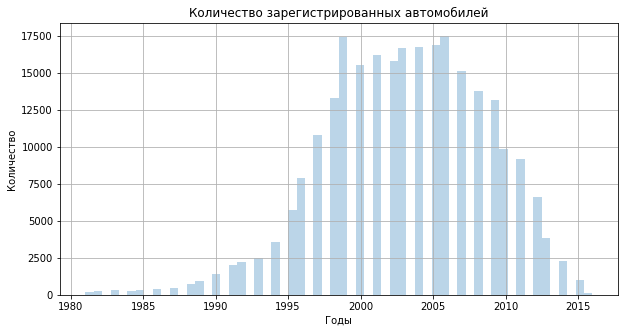

In [37]:
df['registrationyear'].hist(bins=60, figsize = (10,5), alpha = 0.3);
plt.xlabel('Годы')
plt.ylabel('Количество')
plt.title('Количество зарегистрированных автомобилей')
plt.show()

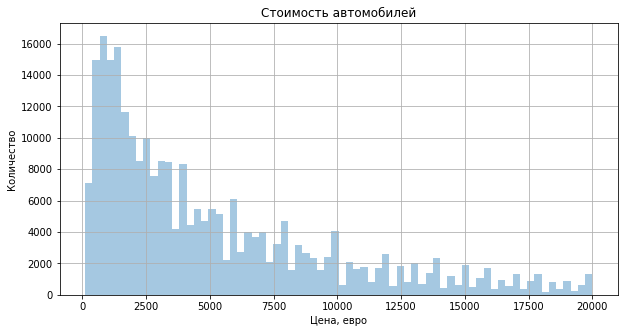

In [38]:
df['price'].hist(bins=70, figsize = (10,5), alpha = 0.4);
plt.xlabel('Цена, евро')
plt.ylabel('Количество')
plt.title('Стоимость автомобилей')
plt.show()

**Вывод по разделу 1**

Загрузили данные и посмотрели на них, выявили:

Данные содержат 354369 строк и 16 столбцов, 
- названия столбцов написаны не по правилам, заменили названия столбцов
- из столбцов 3 столбца с датами (тип данных строки, перевели в тип datetime64)
- посмотрели пропуски в столбеце Repaired заменили на 'no', так как отсутствие означает, что машина не была в ремонте
- остальные категориальные пропуски заменили на заглушку -0.1
- найдены явные дубликаты 5 шт, удалены
- неявные дубликаты не выявлены
- удалили неинформативные столбцы Количество фото, Почтовый индекс владельца анкеты и Месяц регистрации автомобиля
- обработали аномалии и выбросы в столбцах: 
 - Цена (удали Цену < 100 евро)
 - Год регистрации автомобиля (удали данные с годом < 1980 и > 2016, т.к. объявления размещены до 2016 г.)
 - Мощность (удалили данные < 20 и > 2000 л.с.)
 
По итогу обработки осталось:
- 260832 строк и 13 столбцов, что составляет 73,6% данных.

## Обучение моделей

### Подготовка данных

In [39]:
# выделим признаки
features = df.drop(['price', 'datecrawled', 'lastseen', 'datecreated'], axis=1) 

In [40]:
# выделим целевой признак
target = df['price']

In [41]:
# разделим данные на 70/30
features_train, features_test, target_train, target_test = train_test_split(features, target, \
                                                           test_size = 0.3, random_state=12345)

In [42]:
# проверим разбиение
features_train.shape, features_test.shape

((182582, 9), (78250, 9))

In [43]:
target_train.shape, target_test.shape

((182582,), (78250,))

### Масштабирование

In [44]:
# масштабируем количественные признаки — стандартизацией данных StandardScaler 
scaler = StandardScaler()
numeric = ['registrationyear', 'power', 'kilometer']
# настроим на обучающих данных
scaler.fit(features_train[numeric]) 
pd.options.mode.chained_assignment = None
# Преобразуем обучающую и тестовую выборки 
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [45]:
features_train.head()

,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired
159430,bus,0.712699,manual,0.133689,transporter,0.598283,gasoline,volkswagen,no
67586,small,-0.004350,manual,-1.019247,2_reihe,-0.087308,petrol,peugeot,no
8816,small,-0.183613,manual,-0.532091,one,-0.087308,petrol,mini,no
12988,bus,0.712699,manual,-0.207321,scenic,-0.087308,petrol,renault,no
219096,wagon,0.354175,auto,1.757542,5er,0.598283,gasoline,bmw,no


### Прямое кодирование

In [46]:
%%time
# преобразуем категориальные признаки — прямым кодирование OHE 
category = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired']
ohe = OneHotEncoder(sparse=False, drop='first')
# настроим на обучающих данных
ohe.fit(features_train[category]) 
# Преобразуем обучающую и тестовую выборки 
features_train_ohe = features_train.drop(columns=category).copy()
features_train_ohe[ohe.get_feature_names()] = ohe.transform(features_train[category])
features_test_ohe = features_test.drop(columns=category).copy()
features_test_ohe[ohe.get_feature_names()] = ohe.transform(features_test[category])

CPU times: user 1min 14s, sys: 2.94 s, total: 1min 17s
Wall time: 1min 17s


In [47]:
features_train_ohe.head()

,registrationyear,power,kilometer,x0_convertible,x0_coupe,x0_other,x0_sedan,x0_small,x0_suv,x0_wagon,...,x4_seat,x4_skoda,x4_smart,x4_subaru,x4_suzuki,x4_toyota,x4_trabant,x4_volkswagen,x4_volvo,x5_yes
159430,0.712699,0.133689,0.598283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67586,-0.004350,-1.019247,-0.087308,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8816,-0.183613,-0.532091,-0.087308,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12988,0.712699,-0.207321,-0.087308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219096,0.354175,1.757542,0.598283,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Модель линейной регрессии

In [48]:
%%time
# Обучим модель линейной регрессии
model = LinearRegression()
scores = cross_validate(model, features_train_ohe, target_train, \
                        scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
print('RMSE: ', round((abs(scores['test_score'].mean()))**0.5, 3))
print('\nВремя обучения ', round(scores['fit_time'].mean(), 3))
print('Время предсказания ', round(scores['score_time'].mean(), 3))
print('')

RMSE:  2401.127

Время обучения  10.701
Время предсказания  0.112

CPU times: user 22.4 s, sys: 10.2 s, total: 32.6 s
Wall time: 32.7 s


In [49]:
fit_time = []
score_time = []
rmse = []
fit_time.append(round(scores['fit_time'].mean(), 3))
score_time.append(round(scores['score_time'].mean(), 3))
rmse.append(round((abs(scores['test_score'].mean()))**0.5, 3))

### Модель CatBoost

In [50]:
%%time
# Обучим модель градиентного бустинга CatBoost. В данной моделе будем менять гиперпараметры:
# максимальную глубину дерева - depth, скорость обучения - learning_rate
model = CatBoostRegressor(iterations=50)
parameters = [{'depth':[8, 10], 'learning_rate':[0.5, 0.8]}]
grid = GridSearchCV(estimator=model, param_grid=parameters, \
                    scoring='neg_mean_squared_error', cv = 3, n_jobs=-1)
grid.fit(features_train, target_train, cat_features=category, verbose=False)
print('RMSE: ', round(abs(grid.best_score_)**0.5, 3))
print('Лучшие параметры: ', grid.best_params_)
print('\nВремя обучения ', round(grid.cv_results_['mean_fit_time'].mean(), 3))
print('Время предсказания ', round(grid.cv_results_['mean_score_time'].mean(), 3))
print('')

RMSE:  1564.965
Лучшие параметры:  {'depth': 10, 'learning_rate': 0.5}

Время обучения  3.952
Время предсказания  0.08

CPU times: user 42.4 s, sys: 466 ms, total: 42.8 s
Wall time: 54.1 s


In [51]:
fit_time.append(round(grid.cv_results_['mean_fit_time'].mean(), 3))
score_time.append(round(grid.cv_results_['mean_score_time'].mean(), 3))
rmse.append(round(abs(grid.best_score_)**0.5, 3))

### Модель LightGBM

LightGBM модель умеет работать с категориальными признаками, кодировка не нужна. Объявим категориальные признаки.

In [52]:
features_train.loc[:, category] = features_train.loc[:, category].astype('category')
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182582 entries, 159430 to 237027
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   vehicletype       182582 non-null  category
 1   registrationyear  182582 non-null  float64 
 2   gearbox           182582 non-null  category
 3   power             182582 non-null  float64 
 4   model             182582 non-null  category
 5   kilometer         182582 non-null  float64 
 6   fueltype          182582 non-null  category
 7   brand             182582 non-null  category
 8   repaired          182582 non-null  category
dtypes: category(6), float64(3)
memory usage: 6.8 MB


In [53]:
%%time
# Обучим модель градиентного бустинга LightGBM. В данной моделе будем менять гиперпараметры:
# n_estimators - число деревьев , num_leaves - максимальное количество листьев, 
# максимальную глубину дерева - max_depth, скорость обучения - learning_rate
model = lgb.LGBMRegressor()
parameters = {'n_estimators': [8,10],
              'num_leaves': [8,10],
              'max_depth':[2,4],
             'learning_rate':[0.5, 0.8] }
grid = GridSearchCV(estimator=model, param_grid=parameters, \
                    scoring='neg_mean_squared_error', cv = 3, n_jobs=-1)
grid.fit(features_train, target_train)
print(f'RMSE:  {(-grid.best_score_)**0.5:.3f}')
print(f'Лучшие гиперпараметры:  {grid.best_params_}')
print('\nВремя обучения ', round(grid.cv_results_['mean_fit_time'].mean(), 3))
print('Время предсказания ', round(grid.cv_results_['mean_score_time'].mean(), 3))
print('')

RMSE:  1822.042
Лучшие гиперпараметры:  {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 10, 'num_leaves': 10}

Время обучения  0.551
Время предсказания  0.087

CPU times: user 31.1 s, sys: 0 ns, total: 31.1 s
Wall time: 31.4 s


In [54]:
fit_time.append(round(grid.cv_results_['mean_fit_time'].mean(), 3))
score_time.append(round(grid.cv_results_['mean_score_time'].mean(), 3))
rmse.append(round(abs(grid.best_score_)**0.5, 3))

In [55]:
df_total = pd.DataFrame({'Модель':['Линейная регрессия', 'Модель CatBoost', 'Модель LightGBM'], \
                         'Время обучения':fit_time, 'Время предсказания':score_time,
                         'RMSE':rmse})
df_total

,Модель,Время обучения,Время предсказания,RMSE
0,Линейная регрессия,10.701,0.112,2401.127
1,Модель CatBoost,3.952,0.080,1564.965
2,Модель LightGBM,0.551,0.087,1822.042


**Вывод по 2 разделу**
- оставили в качестве признаков (9 шт) : тип автомобильного кузова; год регистрации автомобиля; тип коробки передач; мощность (л. с.); модель автомобиля; пробег (км); тип топлива; марка автомобиля; была машина в ремонте 
- разделили данные на 70/30
- масштабировали количественные признаки — стандартизацией данных StandardScaler 
- преобразовали категориальные признаки — прямым кодирование OHE и использовали эти данные в модели линейной регрессии, остальные модели самостоятельно работают с категориальными признаками.

Обучили три модели, две из них с использованием кросс валидации и подбора параметров GridSearchCV, выбрали лучшие параметры и оценили качество моделей.

Наилучший результат показала модель Модель CatBoost с параметрами: {'depth': 10, 'learning_rate': 0.5}

наилучшая RMSE = 1564.965

наилучшее Время предсказания = 0.078

Время обучения второе = 3.913


## Анализ моделей

### Проверка модели на тестовой выборке

In [56]:
%%time
model = CatBoostRegressor(iterations=50, depth=10, learning_rate=0.5)
model.fit(features_train, target_train, cat_features=category, verbose=False)

CPU times: user 4.88 s, sys: 0 ns, total: 4.88 s
Wall time: 5.64 s


In [57]:
%%time
predicted_test = model.predict(features_test)
rmse_test = mean_squared_error(target_test, predicted_test)**0.5
print('Тестовая выборка')
print('RMSE: ', round(rmse_test, 3))

Тестовая выборка
RMSE:  1550.036
CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 107 ms


### Проверка модели на адекватность

In [58]:
%%time
# модель Dummy
dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, target_train)

CPU times: user 2.25 ms, sys: 0 ns, total: 2.25 ms
Wall time: 1.18 ms


DummyRegressor()

In [59]:
%%time
prediced_dummy = dummy.predict(features_test)
rmse_dummy = mean_squared_error(target_test, prediced_dummy)**0.5
print('Dummy модель')
print('RMSE: ', round(rmse_dummy, 3))

Dummy модель
RMSE:  4664.613
CPU times: user 1.98 ms, sys: 0 ns, total: 1.98 ms
Wall time: 1.53 ms


In [60]:
df_total_t = pd.DataFrame({'Модель':['Модель CatBoost Обучающая', 'Модель CatBoost Тестовая', \
                                     'Константная модель'], \
                           'RMSE': [rmse[1], round(rmse_test, 3), round(rmse_dummy, 3)]})
df_total_t

,Модель,RMSE
0,Модель CatBoost Обучающая,1564.965
1,Модель CatBoost Тестовая,1550.036
2,Константная модель,4664.613


**Вывод по 3 разделу:**

В результате проверки наилучшей модели на тестовой выборке данные улучшились.
- RMSE: 1550.036


Также в результате сравнения с константной моделью видны лучшие характеристики нашей модели.
Соответственно работа выполнена, модель обучена и проверена.



## Общий вывод по проекту

Проанализировав исторические данные: технические характеристики, комплектации и цены автомобилей. Опираясь на критерии заказчика: - качество предсказания; - скорость предсказания; - время обучения. Была выбрана лучшая модель, и проверено её качество на тестовой выборке.

Ей стала Модель CatBoost с параметрами: {'depth': 10, 'learning_rate': 0.5}.

В 1 разделе: 

Загрузили данные и посмотрели на них, выявили:
Данные содержат 354369 строк и 16 столбцов,
-	названия столбцов написаны не по правилам, заменили названия столбцов
-	из столбцов 3 столбца с датами (тип данных строки, перевели в тип datetime64)
-	посмотрели пропуски в столбеце Repaired заменили на 'no', так как отсутствие означает, что машина не была в ремонте
-	остальные категориальные пропуски заменили на заглушку -0.1
-	найдены явные дубликаты 5 шт, удалены
-	неявные дубликаты не выявлены
-	удалили неинформативные столбцы Количество фото, Почтовый индекс владельца анкеты и Месяц регистрации автомобиля
-	обработали аномалии и выбросы в столбцах:
    - Цена (удали Цену < 100 евро)
    - Год регистрации автомобиля (удали данные с годом < 1980 и > 2016, т.к. объявления размещены до 2016 г.)
    - Мощность (удалили данные < 20 и > 2000 л.с.)
По итогу обработки осталось:
-	260832 строк и 13 столбцов, что составляет 73,6% данных.

Во 2 разделе:

-	оставили в качестве признаков (9 шт) : тип автомобильного кузова; год регистрации автомобиля; тип коробки передач; мощность (л. с.); модель автомобиля; пробег (км); тип топлива; марка автомобиля; была машина в ремонте
-	разделили данные на 70/30
-	масштабировали количественные признаки — стандартизацией данных StandardScaler
-	преобразовали категориальные признаки — прямым кодирование OHE и использовали эти данные в модели линейной регрессии, остальные модели самостоятельно работают с категориальными признаками.
Обучили три модели, две из них с использованием кросс валидации и подбора параметров GridSearchCV, выбрали лучшие параметры и оценили качество моделей.

Наилучший результат показала модель Модель CatBoost с параметрами: {'depth': 10, 'learning_rate': 0.5}

наилучшая RMSE = 1564.965
наилучшее Время предсказания = 0.078
Время обучения второе = 3.913

В 3 разделе:

В результате проверки наилучшей модели на тестовой выборке данные улучшились.
-	RMSE: 1550.036
Также в результате сравнения с константной моделью видны лучшие характеристики нашей модели. Соответственно работа выполнена, модель обучена и проверена.
